In [60]:
# *Morphological operators are sets of kernels that can 
# achieve a variety of effects, such as reducing noise
# * Certain operators are very good at reducing black points
# on a white background (and vice versa)
# * Certain operators can also achieve an erosion and dilation
# effect that can add or erode from an existing image.
# * This effect is most easily seen on text data, so we
# will practice various morphological operators on some simple
# white text on a black background.


In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text="ABCDE",org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
    return blank_img

In [63]:
def display_img(blank_img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(blank_img,cmap='gray')

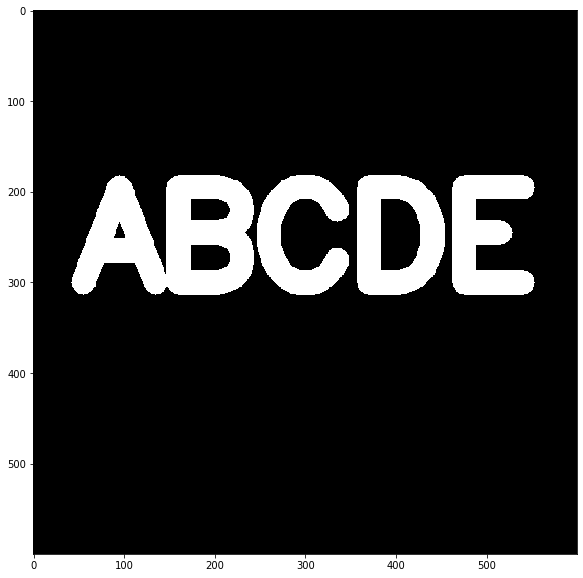

In [64]:
img = load_img()
display_img(img)

In [65]:
#Erosion operation
kernel = np.ones((5,5),dtype=np.uint8)


In [66]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [67]:
result = cv2.erode(img,kernel,iterations=4)

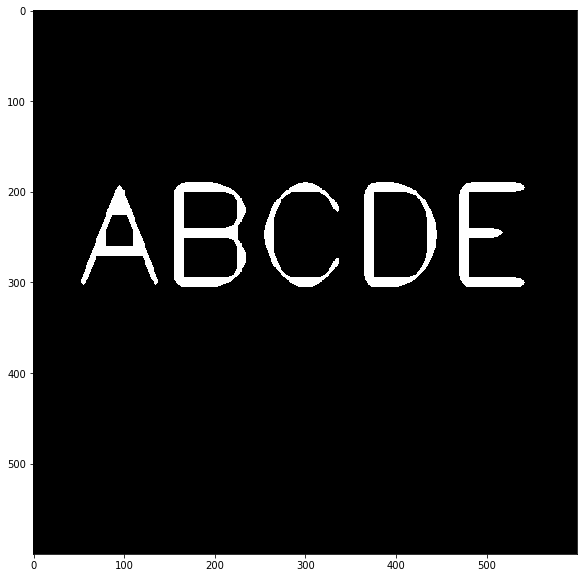

In [68]:
display_img(result)

In [69]:
img = load_img()

In [70]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [71]:
white_noise

array([[1, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]])

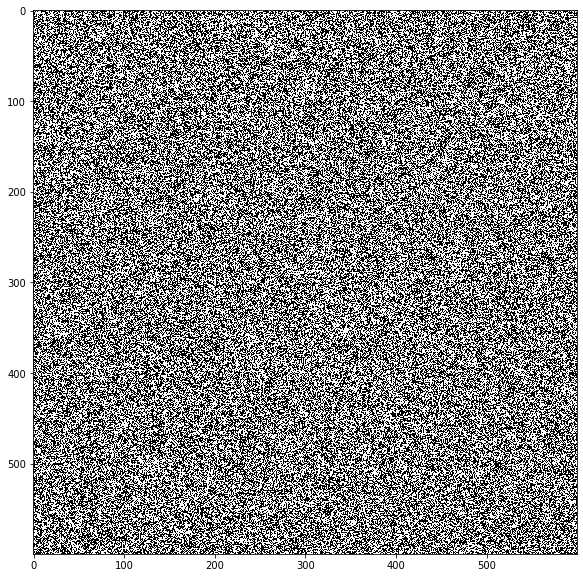

In [72]:
display_img(white_noise)

In [73]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
img.max()

255.0

In [75]:
white_noise = white_noise *255

In [76]:
white_noise

array([[255,   0, 255, ..., 255,   0,   0],
       [  0, 255,   0, ...,   0, 255, 255],
       [  0,   0, 255, ...,   0, 255,   0],
       ...,
       [255,   0, 255, ..., 255,   0, 255],
       [255,   0, 255, ...,   0, 255,   0],
       [  0, 255,   0, ...,   0,   0,   0]])

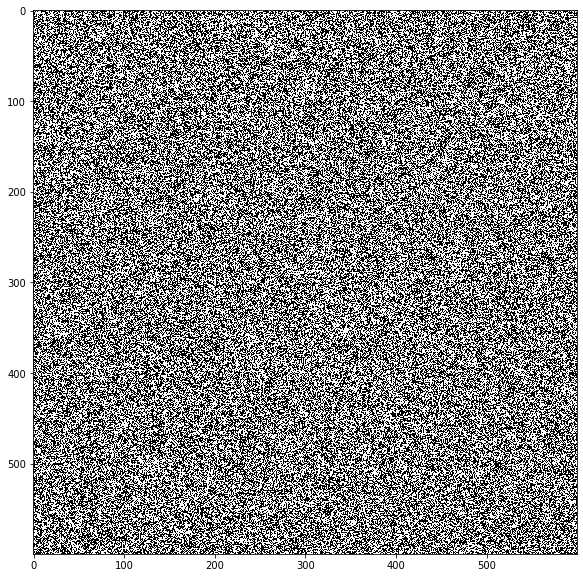

In [77]:
display_img(white_noise)

In [78]:
noise_img = white_noise + img

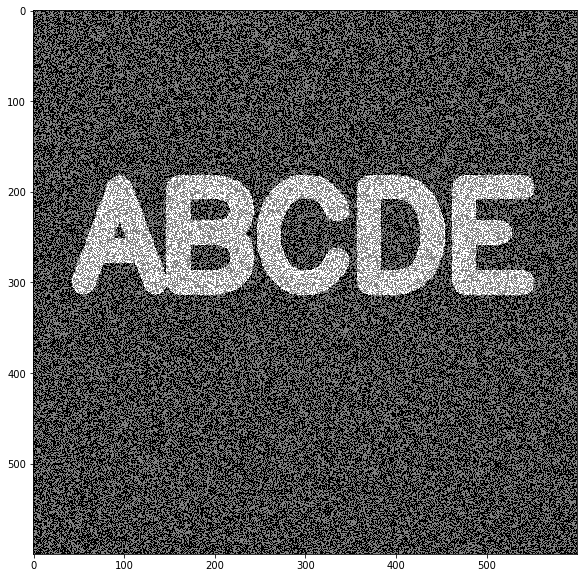

In [79]:
display_img(noise_img)

In [80]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

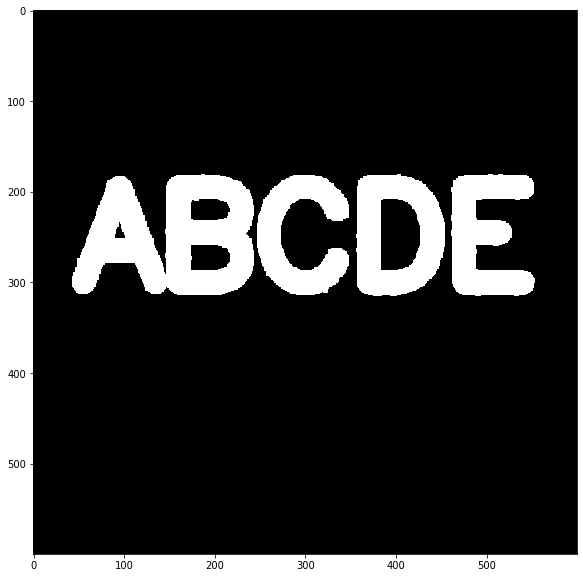

In [81]:
display_img(opening)

In [82]:
img = load_img()

In [83]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [84]:
black_noise

array([[0, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 1]])

In [85]:
black_noise = black_noise * -255

In [86]:
black_noise

array([[   0,    0, -255, ..., -255, -255, -255],
       [-255,    0, -255, ..., -255, -255, -255],
       [-255,    0,    0, ..., -255, -255,    0],
       ...,
       [-255, -255,    0, ..., -255, -255,    0],
       [   0,    0, -255, ...,    0, -255,    0],
       [-255, -255,    0, ..., -255, -255, -255]])

In [87]:
black_noise_img = img + black_noise

In [88]:
black_noise_img

array([[   0.,    0., -255., ..., -255., -255., -255.],
       [-255.,    0., -255., ..., -255., -255., -255.],
       [-255.,    0.,    0., ..., -255., -255.,    0.],
       ...,
       [-255., -255.,    0., ..., -255., -255.,    0.],
       [   0.,    0., -255., ...,    0., -255.,    0.],
       [-255., -255.,    0., ..., -255., -255., -255.]])

In [89]:
black_noise_img[black_noise_img == -255] = 0

In [90]:
black_noise_img.min()

0.0

In [91]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

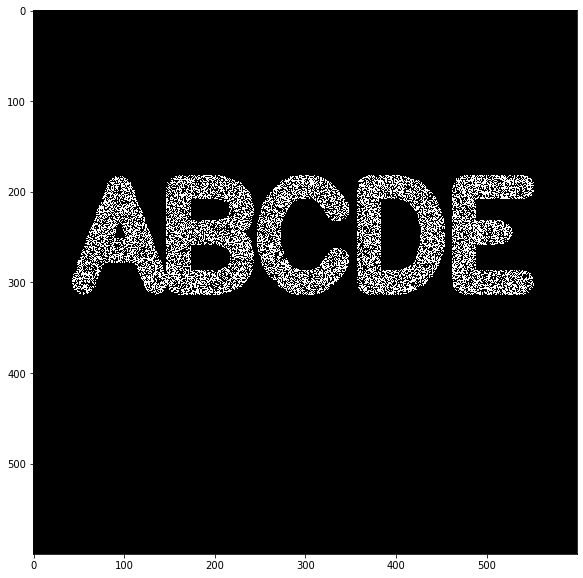

In [92]:
display_img(black_noise_img)

In [93]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

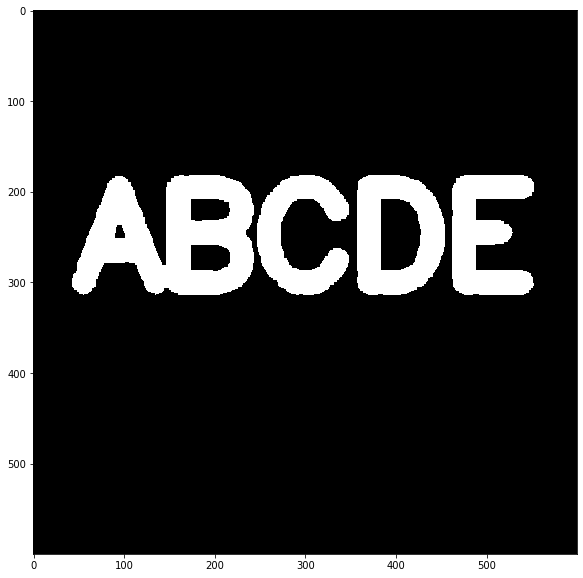

In [94]:
display_img(closing)

In [95]:
#Morphological gradiant

img = load_img()

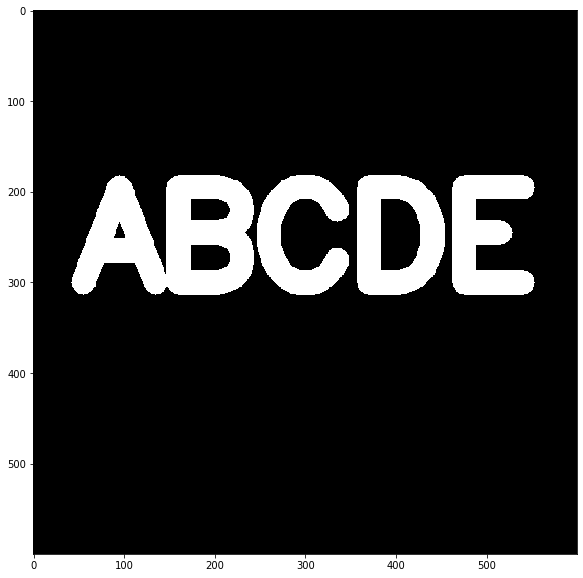

In [96]:
display_img(img)

In [97]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

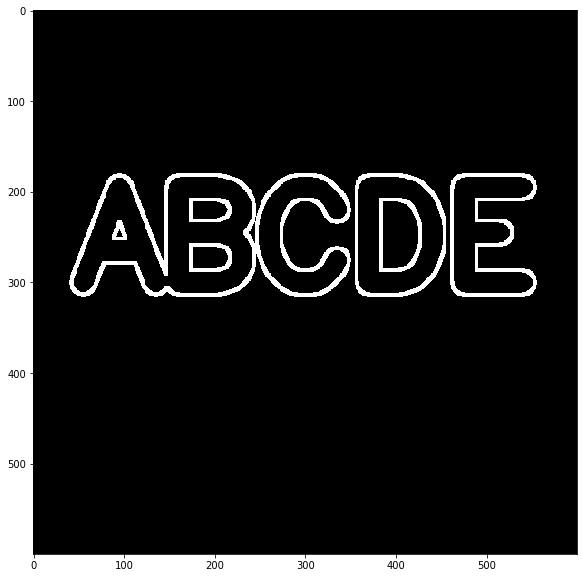

In [98]:
display_img(gradient)